In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
from statistics import mean
import numpy as np
pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud_math = pd.read_csv('stud_math.csv')

## цели и задачи проекта

* Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

* И сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы (вот она, сила ML!). Чтобы определиться с параметрами будущей модели, проведите разведывательный анализ данных и составьте отчёт по его результатам. 

## Первичный отсмотр данных

Рассмотрим, какие данные хранятся в файле и какие типы данных у столбцов:

In [2]:
display(stud_math.head(10))
stud_math.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

В датасете присутствует 395 строк и 30 столбцов из которых 13 столбцов числовые и 17 строковых

Для удобства использования pandas напишем все столбцы с маленькой буквы:

In [3]:
stud_math.columns = ['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu', 'mjob', 'fjob', 'reason',
                     'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
                     'nursery', 'granular', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health',
                     'absences', 'score']

## Предобработка

In [4]:
stud_math = stud_math[stud_math['score'] > 0]


def no_nan(column):
    """Функция получает на вход имя столбца типа
    "object" и заменяет все пропуски на nan """
    stud_math[column] = stud_math[column].astype(
        str).apply(lambda x: None if x.strip() == '' else x)


for col in list(stud_math.describe(include=['object']).columns):
    no_nan(col)


def func_counter(row, my_dict):
    """Функция получает на вход профессию, образование
    и словарь с предположением о профессии и возвращает
    более вероятное образование"""

    if pd.isnull(row[0]):
        return my_dict[row[1]]
    else:
        return row[0]


def func_job(row):
    """Функция получает на вход профессию, образование
    и возвращает более вероятную профессию"""

    if row[0] == 'nan':
        if row[1] <= 2.0:
            return 'at_home'
        elif row[1] <= 3.0:
            return 'services'
        elif row[1] <= 4.0:
            return 'teacher'
        elif pd.isnull(row[1]):
            return 'other'
    return row[0]


def substitution_function(row, mean):
    """Функция получает на вход адрес проживания, за какой время
    ученик добирается до школы и среднее время которое ученики тратят
    на дорогу до школы. Функция возвращает место жительства."""

    if row[1] == 'nan':
        if row[0] <= mean:
            row[1] = 'U'
        else:
            row[1] = 'R'

    return row[1]


def famsize_function(row):
    """Функция получает на вход место проживания и состав семьи.
    Функция возвращает предположительный состав семьи."""
    if row[1] == 'nan':
        if row[0] == 'U':
            return 'LE3'
        elif row[0] == 'R':
            return 'GT3'
    return row[1]


def famsize_traveltime(row):
    """Функция получает на вход место проживания и состав семьи.
    Функция возвращает предположительный состав семьи."""
    if pd.isnull(row[1]):
        if row[0] == 'U':
            return 2.0
        elif row[0] == 'R':
            return 3.0
    return row[1]


def studytime_function(row):
    """Функция получает на вход состав семьи, удалённость от школы, и пол
    функция возвращает предположительное время на учёбу после школы."""
    if pd.isnull(row[0]):
        if (row[1] == 'GT3') & (row[2] == 'R') & (row[3] == 'F'):
            return 4.0
        elif (row[1] == 'GT3') & (row[2] == 'U') & (row[3] == 'F'):
            return 4.0
        elif (row[1] == 'LE3') & (row[2] == 'U') & (row[3] == 'F'):
            return 3.0
        elif (row[1] == 'LE3') & (row[2] == 'R') & (row[3] == 'F'):
            return 3.0
        elif ((row[1] == 'GT3') & (row[2] == 'R') & (row[3] == 'M')) or ((row[1] == 'LE3') & (row[2] == 'R') & (row[3] == 'M')):
            return 2.0
        else:
            return 1.0
    else:
        return row[0]


def failures_function(row):
    """Функция получает на вход время на учёбу после школы и количество неудач
    функция возвращает предположительное оличество неудач."""
    if pd.isnull(row[0]):
        if row[1] == 4.0:
            return 0.0
        elif row[1] == 3.0:
            return 1.0
        elif row[1] == 2.0:
            return 2.0
        elif row[1] == 1.0:
            return 3.0
    else:
        return row[0]


def higher_function(row):
    """Функция получает на вход желание получить высшее образование и наличие интернета
    функция возвращает предположительное желание получить высшее образование."""
    if row[0] == 'nan':
        if row[1] == 'yes':
            return 'yes'
        elif row[1] == 'no':
            return 'no'
    return row[0]


def schoolsup_function(row):
    """Функция получает на вход желание получить высшее образование и дополнительную образовательную поддержку
    функция возвращает предположительное желание получить дополнительную образовательную поддержку."""
    if row[0] == 'nan':
        if row[1] == 'yes':
            return 'no'
        elif row[1] == 'no':
            return 'yes'
    return row[0]


def famsup_function(row):
    """Функция получает на вход образование матери и дополнительную семейную образовательную поддержку
    функция возвращает предположительное желание получить дополнительную семейную образовательную поддержку"""
    if row[0] == 'nan':
        if (row[1] == 4) or (row[1] == 3):
            return 'yes'
        elif (row[1] == 2) or (row[1] == 1) or (row[1] == 0):
            return 'no'
    return row[0]


def paid_function(row):
    """Функция получает на вход работу матери и дополнительные занятия по математике
    функция возвращает предположительное возможность занятия по математике."""
    if row[0] == 'nan':
        if row[1] == 'services':
            return 'yes'
        elif row[1] == 'other':
            return 'no'
        elif row[1] == 'teacher':
            return 'yes'
        elif row[1] == 'at_home':
            return 'no'
        elif row[1] == 'health':
            return 'no'
    return row[0]


def activities_function(row):
    """Функция получает на вход дополнительные внеучебные занятия и время учёбы помимо школы
    функция возвращает предположительное возможность дополнительных внеучебных занятии."""
    if row[0] == 'nan':
        if row[1] >= 2:
            return 'yes'
        elif row[1] <= 1:
            return 'no'
    return row[0]


def nursery_function(row):
    """Функция получает на вход данные по детскому саду и состав семьи
    функция возвращает предположительное посещение детского сада."""
    if row[0] == 'nan':
        if row[1] == 'GT3':
            return 'no'
        elif row[1] == 'LE3':
            return 'yes'
    return row[0]


def internet_function(row):
    """Функция получает на вход желание получить высшее образование и наличие интернета
    функция возвращает предположительное наличие интернета"""
    if row[0] == 'nan':
        if row[1] == 'yes':
            return 'yes'
        elif row[1] == 'no':
            return 'no'
    return row[0]


def romantic_function(row):
    """Функция получает на вход наличие романтических отношений и возраст
    функция возвращает предположительное наличие романтических отношений."""
    if row[0] == 'nan':
        if row[1] >= 17:
            return 'yes'
        elif row[1] <= 16:
            return 'no'
    return row[0]


def pstatus_function(row):
    """Функция получает на вход статус совместного жилья и 
    статус отношений Функция возвращает предположительный статус семьи."""
    if row[0] == 'nan':
        if row[1] > 2:
            return 'T'
        elif row[1] <= 2:
            return 'A'
    return row[0]


def famrel_function(row):
    """Функция получает на вход семейные отношения и статус семьи
    Функция возвращает предположительную оценку отношений."""
    if pd.isnull(row[0]):
        if row[1] == 'T':
            return 4.0
        elif row[1] == 'A':
            return 2.0
    return row[0]


def freetime_function(row):
    """Функция получает на вход свободное время после школы и время на учёбу помимо школы
    Функция возвращает предположительное значение свободного времени после школы."""
    if pd.isnull(row[0]):
        if row[1] == 4.0:
            return 1.0
        elif row[1] == 3.0:
            return 2.0
        elif row[1] == 2.0:
            return 3.0
        elif row[1] == 1.0:
            return 4.0
    return row[0]


def goout_function(row):
    """Функция получает на вход свободное время после школы и время проведённое с друзьями
    Функция возвращает предположительное значение времени проведённого с друзьями."""
    if pd.isnull(row[0]):
        if row[1] == 1.0:
            return 1.0
        elif row[1] == 2.0:
            return 2.0
        elif row[1] == 3.0:
            return 3.0
        elif row[1] == 4.0:
            return 4.0
        elif row[1] == 5.0:
            return 5.0
    return row[0]


def absences_function(row):
    """Возвращает среднее значение столбца"""
    if pd.isnull(row):
        return stud_math['absences'].median()
    return row


def reasen_function(row):
    """Функция получает на вход причину 
   и возвращает предположительный пердположительное значение."""
    if row == 'nan':
        return 'course'
    return row


def guardian_function(row):
    """Функция получает на вход опекуна 
   и возвращает предположительный пердположительное значение."""
    if row == 'nan':
        return 'mother'
    return row


def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(5, 4))
    sns.boxplot(x=column, y='score',
                data=stud_math.loc[stud_math.loc[:, column].isin(
                    stud_math.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:40]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'],
                     stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

## Первичный анализ данных в столбцах

In [5]:
display(stud_math.head(10))

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,nan,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,nan,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,nan,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,nan,no,yes,-6.0,yes,yes,nan,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,nan,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,nan,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,nan,nan,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


Начинаем проверять все столбцы по отдельности. 

## Столбец - school

In [6]:
# В столбце нет пропусков, это просто аббревиатура школы.
print(stud_math['school'].value_counts())

GP    311
MS     41
Name: school, dtype: int64


## Столбец - sex

F    182
M    170
Name: sex, dtype: int64


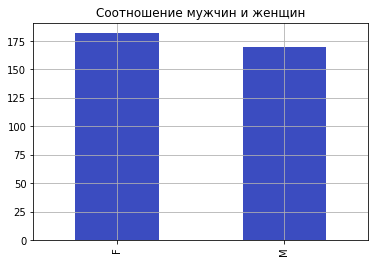

In [7]:
# В столбце нет пропусков, в столбце представлен пол ученика.
print(stud_math['sex'].value_counts())
stud_math['sex'].value_counts().plot(kind='bar',
                                     grid=True,
                                     colormap='coolwarm',
                                     title='Соотношение мужчин и женщин')

In [8]:
stud_math['age'].value_counts()

16    96
17    90
15    76
18    69
19    16
20     3
22     1
21     1
Name: age, dtype: int64

## Столбец - age

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


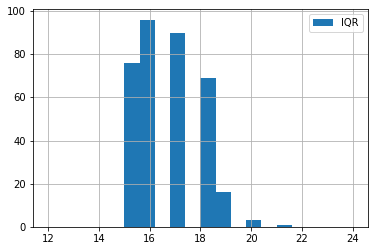

In [9]:
# В столбце нет пропусков, в столбце представлен возраст учеников.
median = stud_math['age'].median()
IQR = stud_math['age'].quantile(0.75) - stud_math['age'].quantile(0.25)
perc25 = stud_math['age'].quantile(0.25)
perc75 = stud_math['age'].quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
stud_math['age'].loc[stud_math['age'].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=20, range=(12, 24),
                                                                                        label='IQR')
plt.legend()

# Убираем выбросы
stud_math = stud_math[stud_math['age'] <= 21]

## Столбец - address

Количество пропущенных значений в столбце: 14


,address
U,270
R,81


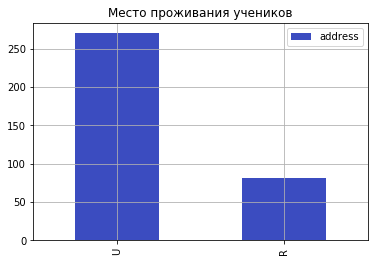

In [10]:
# В столбце есть пропуски, в столбце представлен тип ('U' - городской, 'R' - за городом) адреса проживания учеников.
# Сортируем адреса без NaN

print('Количество пропущенных значений в столбце: {}'.format(
    len(stud_math[stud_math['address'] == 'nan'])))

sort_addres = stud_math[stud_math['address'] != 'nan']
# Высчитываем среднее время похода в школу
mean_traveltime = sort_addres.groupby('address')['traveltime'].mean().mean()

# Подставляем значения
stud_math['address'] = stud_math[['traveltime', 'address']].apply(
    lambda row: substitution_function(row, mean_traveltime), axis=1)


display(pd.DataFrame(stud_math['address'].value_counts()))
stud_math['address'].value_counts().plot(kind='bar',
                                         grid=True,
                                         colormap='coolwarm',
                                         title='Место проживания учеников',
                                         legend=True)

По времени пути до школы, делаем вывод, что чем больше ученик тратит времени на дорогу, том больше вероятность, что он живёт за городом. 

## Столбец - famsize

Количество пропущенных значений в столбце: 24
GT3    232
LE3    119
Name: famsize, dtype: int64


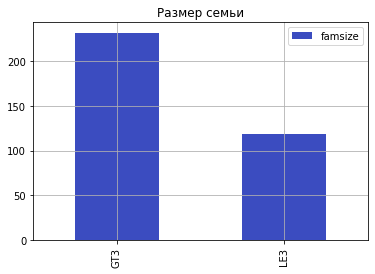

In [11]:
# В столбце есть пропуски, в столбце указан размер семьи учеников ('LE3' <= 3, 'GT3' >3).
# Проставляем состав семьи

print('Количество пропущенных значений в столбце: {}'.format(
    len(stud_math[stud_math['famsize'] == 'nan'])))

# Подставляем значения
stud_math['famsize'] = stud_math[['address', 'famsize']].apply(
    lambda row: famsize_function(row), axis=1)

# Пока данных слишком мало, пропуски заполнить нечем.
print(stud_math['famsize'].value_counts())
stud_math['famsize'].value_counts().plot(kind='bar',
                                         grid=True,
                                         colormap='coolwarm',
                                         title='Размер семьи',
                                         legend=True)

За городом живут как правило более большие семьи 

## Столбец - Pstatus

Количество пропущенных значений в столбце: 41
famrel  pstatus
-1.0    nan        1.000000
 1.0    T          0.500000
        nan        0.333333
        A          0.166667
 2.0    T          0.785714
        A          0.214286
 3.0    T          0.767857
        nan        0.160714
        A          0.071429
 4.0    T          0.828221
        nan        0.104294
        A          0.067485
 5.0    T          0.735632
        nan        0.137931
        A          0.126437
Name: pstatus, dtype: float64


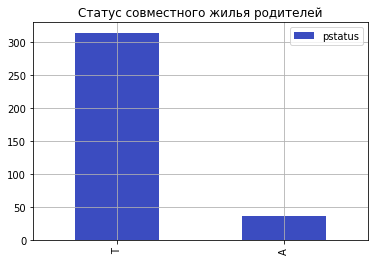

In [12]:
# В столбце есть пропуски, в столбце указан статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

print('Количество пропущенных значений в столбце: {}'.format(
    len(stud_math[stud_math['pstatus'] == 'nan'])))

print(stud_math.groupby('famrel')['pstatus'].value_counts(normalize=True))

# Подставляем значения
stud_math['pstatus'] = stud_math[['pstatus', 'famrel']].apply(
    lambda row: pstatus_function(row), axis=1)

stud_math['pstatus'].value_counts().plot(kind='bar',
                                         grid=True,
                                         colormap='coolwarm',
                                         title='Cтатус совместного жилья родителей',
                                         legend=True)

Чем выше показатель семейных отношений, том больше вероятность что семья полная.  

## Столбец - mjob

Количество пропущенных значений в столбце: 17


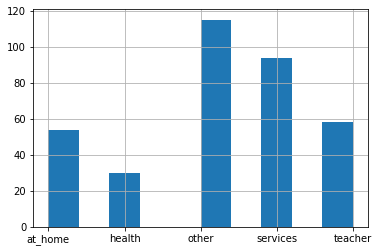

In [13]:
# В столбце есть пропуски, работа матери
# ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба,
# 'at_home' - не работает, 'other' - другое)

print('Количество пропущенных значений в столбце: {}'.format(len(stud_math[stud_math['mjob'] == 'nan'])))
# Сортируем значения без NaN
sort_mjob = stud_math[stud_math['mjob'] != 'nan']

# Находим связь между образованием и профессией
mean_mjob = round(sort_mjob.groupby('mjob')['medu'].mean(), 0)

# Формируем словарь
profession_dict = dict(mean_mjob)
profession_dict

# Заполняем пропуски
stud_math['mjob'] = stud_math[['mjob', 'medu']].apply(
    lambda row: func_job(row), axis=1)

# Смотрим распределение
stud_math['mjob'].hist()

Чем лучше образование, тем больше вероятность высокооплачиваемой профессии   

In [14]:
len(stud_math) - len(stud_math[stud_math['medu']>=0])

2

## Столбец - medu

Количество пропущенных значений в столбце: 2


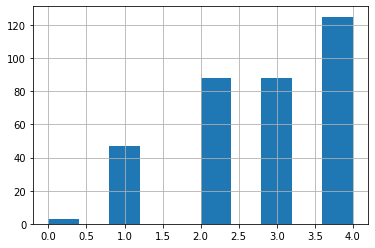

In [15]:
# В столбце есть пропуски, образование матери
# (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

print('Количество пропущенных значений в столбце: {}'.format(
    len(stud_math) - len(stud_math[stud_math['medu'] >= 0])))

# Подставляем значения в Датафрейм
stud_math['medu'] = stud_math[['medu', 'mjob']].apply(
    lambda row: func_counter(row, profession_dict), axis=1)

# Посмотрим на его распределение:
stud_math['medu'].hist()

Чем лучше профессия, тем больше вероятность хорошего образования   

## Столбец - fjob

Количество пропущенных значений в столбце: 32


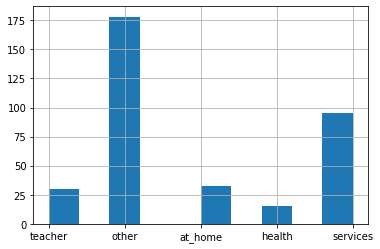

In [16]:
# В столбце есть пропуски, работа отца
# ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба,
# 'at_home' - не работает, 'other' - другое)

print('Количество пропущенных значений в столбце: {}'.format(
    len(stud_math[stud_math['fjob'] == 'nan'])))

# Сортируем значения без NaN
sort_fjob = stud_math[stud_math['fjob'] != 'nan']

# Находим связь между образованием и профессией
mean_fjob = round(sort_mjob.groupby('fjob')['medu'].mean(), 0)

# Формируем словарь
profession_dict = dict(mean_fjob)
profession_dict

# Заполняем пропуски
stud_math['fjob'] = stud_math[['fjob', 'fedu']].apply(
    lambda row: func_job(row), axis=1)

# Смотрим распределение
stud_math['fjob'].hist()

Чем лучше образование, тем больше вероятность высокооплачиваемой профессии   

## Столбец - fedu

Количество пропущенных значений в столбце: 21


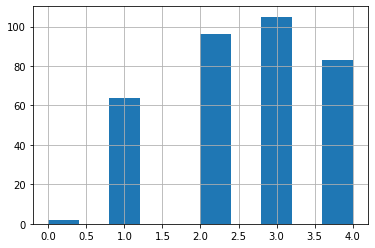

In [17]:
# В столбце есть пропуски, образование матери
# (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

print('Количество пропущенных значений в столбце: {}'.format(
    len(stud_math) - len(stud_math[stud_math['fedu'] >= 0])))

# Подставляем значения в Датафрейм
stud_math['fedu'] = stud_math[['fedu', 'fjob']].apply(
    lambda row: func_counter(row, profession_dict), axis=1)

# Убераем выбросы
stud_math = stud_math[stud_math['fedu'] <= 10]

# Посмотрим на его распределение:
stud_math['fedu'].hist()

Чем лучше профессия, тем больше вероятность хорошего образования   

## Столбец - reason

Количество пропущенных значений в столбце: 15


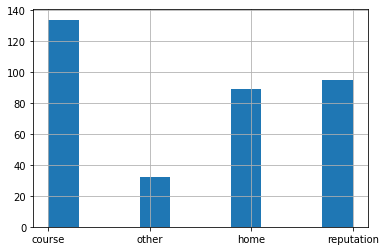

In [18]:
# В столбце есть пропуски, причина выбора школы
# ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
print('Количество пропущенных значений в столбце: {}'.format(
    len(stud_math[stud_math['reason'] == 'nan'])))

# Подставляем значения
stud_math['reason'] = stud_math['reason'].apply(
    lambda row: reasen_function(row))

# Посмотрим на его распределение:
stud_math['reason'].hist()

## Столбец - traveltime

Количество пропущенных значений в столбце: 23
Среднее время затраченное на дорогу в школу в селе: 1.79
Среднее время затраченное на дорогу в школу в городе: 1.33


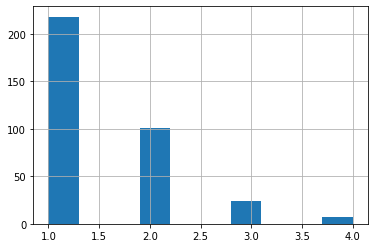

In [19]:
# В столбце есть пропуски, время в пути до школы (1 - < 15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

print('Количество пропущенных значений в столбце: {}'.format(
    len(stud_math) - len(stud_math[stud_math['traveltime'] >= 0])))

# В данном случае мы видим, что школьникам живущим в селе требуется больше времени, чтобы добраться в школу.
print('Среднее время затраченное на дорогу в школу в селе: {}'.format(
    round(sort_addres.groupby('address')['traveltime'].mean().max(), 2)))
print('Среднее время затраченное на дорогу в школу в городе: {}'.format(
    round(sort_addres.groupby('address')['traveltime'].mean().min(), 2)))

# Подставляем значения, 2 для городских жителей и 3 для деревенских
stud_math['traveltime'] = stud_math[['address', 'traveltime']].apply(
    lambda row: famsize_traveltime(row), axis=1)

# Посмотрим на его распределение:
stud_math['traveltime'].hist()

Чем больше человек тратит времени, чтобы добраться до школы, тем больше вероятность что он живёт в селе   

## Столбец - guardian

Количество пропущенных значений в столбце: 29


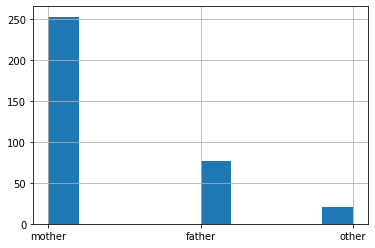

In [20]:
# В столбце есть пропуски, опекун ('mother' - мать, 'father' - отец, 'other' - другое)

print('Количество пропущенных значений в столбце: {}'.format(
    len(stud_math[stud_math['guardian'] == 'nan'])))
# Подставляем значения
stud_math['guardian'] = stud_math['guardian'].apply(
    lambda row: guardian_function(row))

# Посмотрим на его распределение:
stud_math['guardian'].hist()

## Столбец - studytime

In [21]:
# В столбце есть пропуски, время на учёбу помимо школы в неделю
# (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

print('Количество пропущенных значений в столбце: {}'.format(
    len(stud_math) - len(stud_math[stud_math['studytime'] >= 0])))
print('Время на учёбу помимо школы в неделю по составу семьи ',
      stud_math.groupby('famsize')['studytime'].mean())
print()
print('Время на учёбу помимо школы в неделю по удалённости от школы ',
      stud_math.groupby('address')['studytime'].mean())
print()
print('Время на учёбу помимо школы в неделю по полу ',
      stud_math.groupby('sex')['studytime'].mean())

stud_math['studytime'] = stud_math[['studytime', 'famsize', 'address',
                                    'sex']].apply(lambda row: studytime_function(row), axis=1)

stud_math['studytime'].unique()

Количество пропущенных значений в столбце: 7
Время на учёбу помимо школы в неделю по составу семьи  famsize
GT3    2.093333
LE3    1.957627
Name: studytime, dtype: float64

Время на учёбу помимо школы в неделю по удалённости от школы  address
R    2.137500
U    2.019011
Name: studytime, dtype: float64

Время на учёбу помимо школы в неделю по полу  sex
F    2.282486
M    1.795181
Name: studytime, dtype: float64


array([2., 3., 1., 4.])

Видим, что девушки, которые живут в городе в маленькой семье имеют больше времени на учёбу чем остальные 

## Столбец - failures

Количество пропущенных значений в столбце: 20
Количество времени затраченное на учёбу помимо школы: studytime
1.0    0.376
2.0    0.255
3.0    0.164
4.0    0.160
Name: failures, dtype: float64

Образование матери: medu
0.0    1.000
1.0    0.522
2.0    0.284
3.0    0.298
4.0    0.103
Name: failures, dtype: float64


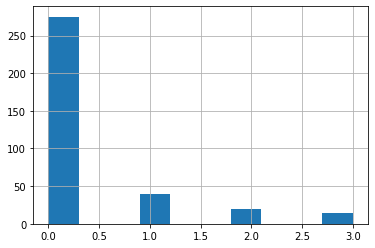

In [22]:
# В столбце есть пропуски
# количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

print('Количество пропущенных значений в столбце: {}'.format(
    len(stud_math) - len(stud_math[stud_math['failures'] >= 0])))
# Группируем по столбцу studytime и видим обратную зависимость от количество
# затраченных часов и количество неудач.
print('Количество времени затраченное на учёбу помимо школы: {}'.format(
    round(stud_math.groupby('studytime')['failures'].mean(), 3)))
print()
# Группируем по столбцу medu и видим обратную зависимость от количество
# затраченных часов и количество неудач.
print('Образование матери: {}'.format(
    round(stud_math.groupby('medu')['failures'].mean(), 3)))

# Подставляем значения
stud_math['failures'] = stud_math[['failures', 'studytime']].apply(
    lambda row: failures_function(row), axis=1)

# Смотрим распределение
stud_math['failures'].hist()

Чем меньше уделялось вниманию учёбе вне школы, тем больше количество неудач  

## Столбец - higher

Количество пропущенных значений в столбце: 19
Ученик хочет получить высшее образование и имеет доступ в интернет:
yes    0.777429
no     0.131661
nan    0.090909
Name: internet, dtype: float64


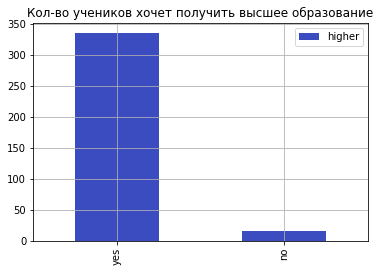

In [23]:
# хочет получить высшее образование (yes или no)
print('Количество пропущенных значений в столбце: {}'.format(
    len(stud_math[stud_math['higher'] == 'nan'])))

# Большинство учеников которые хотят получить
# высшее образование имеют доступ в интернет

print('Ученик хочет получить высшее образование и имеет доступ в интернет:')
print(stud_math[stud_math['higher'] == 'yes']
      ['internet'].value_counts(normalize=True))

# Подставляем значения
stud_math['higher'] = stud_math[['higher', 'internet']].apply(
    lambda row: higher_function(row), axis=1)
stud_math['higher'].value_counts().plot(kind='bar',
                                        grid=True,
                                        colormap='coolwarm',
                                        title='Кол-во учеников хочет получить высшее образование',
                                        legend=True)

Люди хотят получить высшее образование имеют доступ в интернет   

## Столбец - schoolsup

Количество пропущенных значений в столбце: 9
higher  schoolsup
no      no           0.866667
        nan          0.066667
        yes          0.066667
yes     no           0.835821
        yes          0.140299
        nan          0.023881
Name: schoolsup, dtype: float64


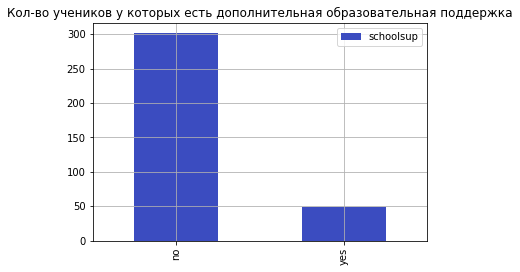

In [24]:
# В столбце есть пропуски
# дополнительная образовательная поддержка (yes или no)
print('Количество пропущенных значений в столбце: {}'.format(
    len(stud_math[stud_math['schoolsup'] == 'nan'])))

print(stud_math.groupby('higher')['schoolsup'].value_counts(normalize=True))

# Подставляем значения
stud_math['schoolsup'] = stud_math[['schoolsup', 'higher']].apply(
    lambda row: schoolsup_function(row), axis=1)

stud_math['schoolsup'].value_counts().plot(kind='bar',
                                           grid=True,
                                           colormap='coolwarm',
                                           title='Кол-во учеников у которых есть дополнительная образовательная поддержка',
                                           legend=True)

## Столбец - famsup

Количество пропущенных значений в столбце: 36
famsup  medu
nan     4.0     15
        2.0     10
        3.0      7
        1.0      3
        0.0      1
no      2.0     33
        4.0     31
        3.0     30
        1.0     23
        0.0      2
yes     4.0     79
        3.0     51
        2.0     44
        1.0     21
Name: medu, dtype: int64


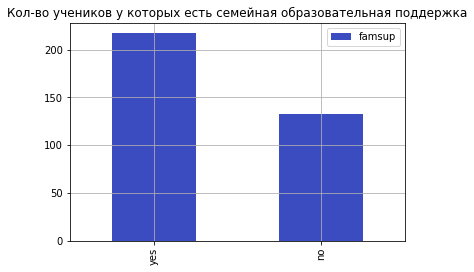

In [25]:
# В столбце есть пропуски
# семейная образовательная поддержка (yes или no)
print('Количество пропущенных значений в столбце: {}'.format(
    len(stud_math[stud_math['famsup'] == 'nan'])))

# Наличие образования у матери указывает на семейную поддержку.
print(stud_math.groupby('famsup')['medu'].value_counts())

# Подставляем значения
stud_math['famsup'] = stud_math[['famsup', 'medu']].apply(
    lambda row: famsup_function(row), axis=1)

stud_math['famsup'].value_counts().plot(kind='bar',
                                        grid=True,
                                        colormap='coolwarm',
                                        title='Кол-во учеников у которых есть семейная образовательная поддержка',
                                        legend=True)

## Столбец - paid

Количество пропущенных значений в столбце: 36


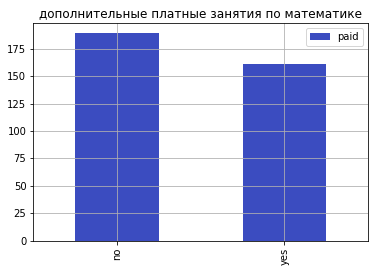

In [26]:
# В столбце есть пропуски
# дополнительные платные занятия по математике (yes или no)
print('Количество пропущенных значений в столбце: {}'.format(
    len(stud_math[stud_math['paid'] == 'nan'])))

# Видем, что если родители работают, то могут позволить оплацивать дополнительные занятия
stud_math.groupby('paid')['mjob'].value_counts()

# Подставляем значения
stud_math['paid'] = stud_math[['paid', 'mjob']].apply(
    lambda row: paid_function(row), axis=1)

stud_math['paid'].value_counts().plot(kind='bar',
                                           grid=True,
                                           colormap='coolwarm',
                                           title='дополнительные платные занятия по математике',
                                           legend=True)

## Столбец - activities

Количество пропущенных значений в столбце: 12
studytime  activities
1.0        no            49
           yes           37
           nan            5
2.0        yes           86
           no            83
           nan            5
3.0        yes           31
           no            24
           nan            2
4.0        yes           17
           no            11
Name: activities, dtype: int64


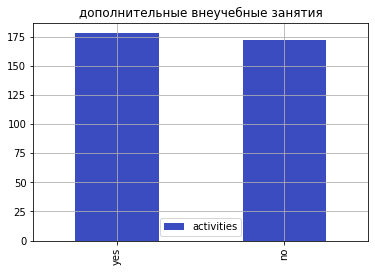

In [27]:
# В столбце есть пропуски
# дополнительные внеучебные занятия (yes или no)
# Видим, что школьники которые занимаются более 2 часов в неделю помимо школы
# чаще посещают внеучебные занятия.
print('Количество пропущенных значений в столбце: {}'.format(
    len(stud_math[stud_math['activities'] == 'nan'])))
print(stud_math.groupby('studytime')['activities'].value_counts())

# Подставляем значения
stud_math['activities'] = stud_math[['activities', 'studytime']].apply(
    lambda row: activities_function(row), axis=1)

stud_math['activities'].value_counts().plot(kind='bar',
                                            grid=True,
                                            colormap='coolwarm',
                                            title='дополнительные внеучебные занятия',
                                            legend=True)

## Столбец - nursery

Количество пропущенных значений в столбце: 12


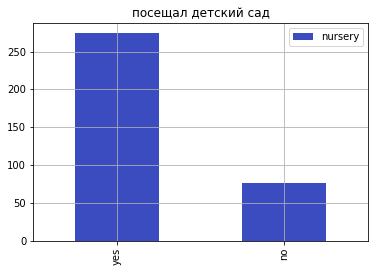

In [28]:
# В столбце есть пропуски
# посещал детский сад (yes или no)
print('Количество пропущенных значений в столбце: {}'.format(
    len(stud_math[stud_math['nursery'] == 'nan'])))

# Подставляем значения
stud_math['nursery'] = stud_math[['nursery', 'famsize']].apply(
    lambda row: nursery_function(row), axis=1)

stud_math['nursery'].value_counts().plot(kind='bar',
                                         grid=True,
                                         colormap='coolwarm',
                                         title='посещал детский сад',
                                         legend=True)

## Столбец - granular

In [29]:
# Столбец ошибочно попал в Датафрейм, удалим его
print(stud_math['granular'].value_counts())
stud_math.drop(['granular'], inplace=True, axis=1)

-6.0     173
-3.0      89
-9.0      57
-12.0     24
Name: granular, dtype: int64


## Столбец - internet

Количество пропущенных значений в столбце: 29


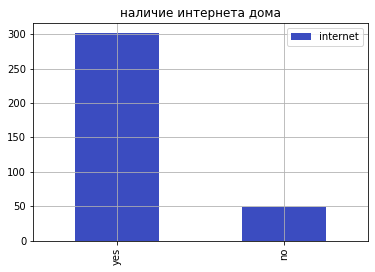

In [30]:
# В столбце есть пропуски
# наличие интернета дома (yes или no)
print('Количество пропущенных значений в столбце: {}'.format(
    len(stud_math[stud_math['internet'] == 'nan'])))

# Подставляем значения
stud_math['internet'] = stud_math[['internet', 'higher']].apply(
    lambda row: internet_function(row), axis=1)

stud_math['internet'].value_counts().plot(kind='bar',
                                          grid=True,
                                          colormap='coolwarm',
                                          title='наличие интернета дома',
                                          legend=True)

## Столбец - romantic

Количество пропущенных значений в столбце: 29
romantic
nan    16.275862
no     16.513761
yes    16.951456
Name: age, dtype: float64


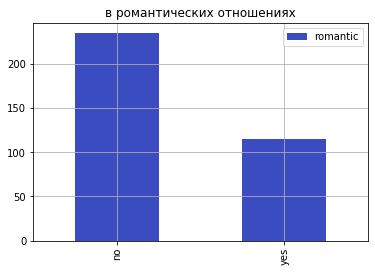

In [31]:
# В столбце есть пропуски
# в романтических отношениях (yes или no))
print('Количество пропущенных значений в столбце: {}'.format(
    len(stud_math[stud_math['romantic'] == 'nan'])))

# Видим, что люди старше 17 лет уже имеют отношения.
print(stud_math.groupby('romantic')['age'].mean())

# Подставляем значения
stud_math['romantic'] = stud_math[['romantic', 'age']].apply(
    lambda row: romantic_function(row), axis=1)

stud_math['romantic'].value_counts().plot(kind='bar',
                                          grid=True,
                                          colormap='coolwarm',
                                          title='в романтических отношениях',
                                          legend=True)

## Столбец - famrel

Количество пропущенных значений в столбце: 25
 4.0    163
 5.0     86
 3.0     56
 2.0     14
 1.0      6
-1.0      1
Name: famrel, dtype: int64
famrel  pstatus
-1.0    A          1.000000
 1.0    A          0.500000
        T          0.500000
 2.0    T          0.785714
        A          0.214286
 3.0    T          0.928571
        A          0.071429
 4.0    T          0.932515
        A          0.067485
 5.0    T          0.872093
        A          0.127907
Name: pstatus, dtype: float64


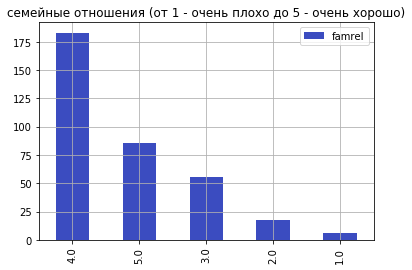

In [32]:
# В столбце есть пропуски
# семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
# Одно значение имеет показатель -1, отфильтруем его
print('Количество пропущенных значений в столбце: {}'.format(
    len(stud_math) - len(stud_math[stud_math['famrel'] >= 0])))

print(stud_math.famrel.value_counts())
print(stud_math.groupby('famrel')['pstatus'].value_counts(normalize=True))

# Подставляем значения
stud_math['famrel'] = stud_math[['famrel', 'pstatus']].apply(
    lambda row: famrel_function(row), axis=1)

# отфильтруем ошибочное значение
stud_math = stud_math[stud_math['famrel'] >= 0]

stud_math['famrel'].value_counts().plot(kind='bar',
                                        grid=True,
                                        colormap='coolwarm',
                                        title='семейные отношения (от 1 - очень плохо до 5 - очень хорошо)',
                                        legend=True)

Чем выше показатель семейных отношений, тем больше вероятность, что семья целая.   

## Столбец - freetime

Количество пропущенных значений в столбце: 8
freetime
1.0    2.500000
2.0    2.017544
3.0    2.143939
4.0    1.980198
5.0    1.800000
Name: studytime, dtype: float64


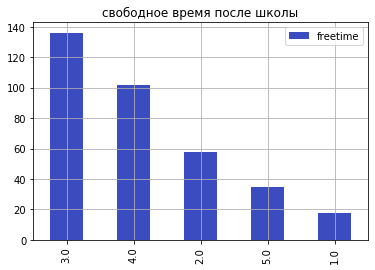

In [33]:
# В столбце есть пропуски
# свободное время после школы (от 1 - очень мало до 5 - очень мого)
print('Количество пропущенных значений в столбце: {}'.format(
    len(stud_math) - len(stud_math[stud_math['freetime'] >= 0])))

# Видим, чем больше времени на учёбу после школы, тем меньше свободного времени
print(stud_math.groupby('freetime')['studytime'].mean())

# Подставляем значения
stud_math['freetime'] = stud_math[['freetime', 'studytime']].apply(
    lambda row: freetime_function(row), axis=1)

stud_math['freetime'].value_counts().plot(kind='bar',
                                          grid=True,
                                          colormap='coolwarm',
                                          title='свободное время после школы',
                                          legend=True)

Чем меньше занятии в не учебное время, тем больше свободного времени   

## Столбец - goout

Количество пропущенных значений в столбце: 6


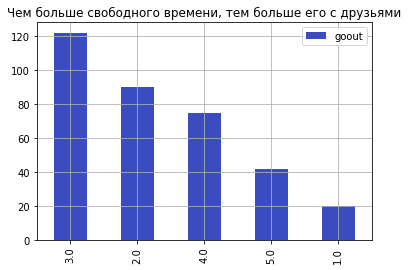

In [34]:
# В столбце есть пропуски
# проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

# Чем больше свободного времени, тем больше его с друзьями
print('Количество пропущенных значений в столбце: {}'.format(
    len(stud_math) - len(stud_math[stud_math['goout'] >= 0])))

# Подставляем значения
stud_math['goout'] = stud_math[['goout', 'freetime']].apply(
    lambda row: goout_function(row), axis=1)

stud_math['goout'].value_counts().plot(kind='bar',
                                       grid=True,
                                       colormap='coolwarm',
                                       title='Чем больше свободного времени, тем больше его с друзьями',
                                       legend=True)

Чем больше свободного времени, тем больше времени проводишь с друзьями

## Столбец - health

Количество пропущенных значений в столбце: 13


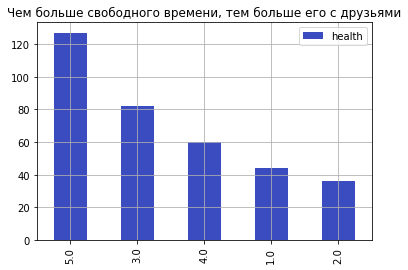

In [35]:
# В столбце есть пропуски
# текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
# Ввидим, что чем лучше отношения в семье, тем выше показатель здоровья
print('Количество пропущенных значений в столбце: {}'.format(
    len(stud_math) - len(stud_math[stud_math['health'] >= 0])))

# Подставляем значения
stud_math['health'] = stud_math[['health', 'famrel']].apply(
    lambda row: goout_function(row), axis=1)

stud_math['health'].value_counts().plot(kind='bar',
                                        grid=True,
                                        colormap='coolwarm',
                                        title='Чем больше свободного времени, тем больше его с друзьями',
                                        legend=True)

Чем лучше семейные отношения, тем лучше себя чувствуешь 

## Столбец - absences

In [36]:
print('Количество пропущенных значений в столбце: {}'.format(
    len(stud_math) - len(stud_math[stud_math['absences'] >= 0])))
stud_math['absences'] = stud_math['absences'].apply(
    lambda row: absences_function(row))

Количество пропущенных значений в столбце: 10


In [37]:
# Удалим выбросы
stud_math = stud_math[stud_math['absences'] < 100]

count    347.000000
mean       6.270893
std        8.220680
min        0.000000
25%        2.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

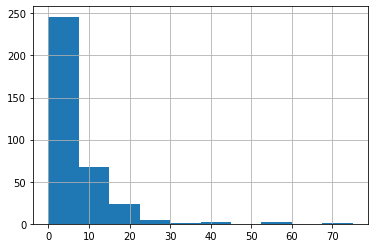

In [38]:
# В столбце есть пропуски
# количество пропущенных занятий
stud_math['absences'].hist()
stud_math['absences'].describe()

25-й перцентиль: 2.0, 75-й перцентиль: 8.0, IQR: 6.0,  Границы выбросов: [-7.0, 17.0].


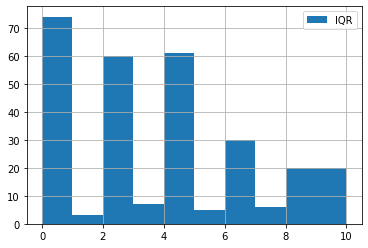

In [39]:
median = stud_math['absences'].median()
IQR = stud_math['absences'].quantile(
    0.75) - stud_math['absences'].quantile(0.25)
perc25 = stud_math['absences'].quantile(0.25)
perc75 = stud_math['absences'].quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
stud_math['absences'].loc[stud_math['absences'].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=10, range=(0, 10),
                                                                                                  label='IQR')
plt.legend()

Данный столбец не коррелируется с остальными данными, поэтому для заполнения пропусков использовал среднее значение 

## Корреляционный анализ

In [40]:
# Используем для наглядности матрицу корреляций:
stud_math.corr()

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.130229,-0.108860,0.110449,0.002251,0.097085,0.036104,-0.046939,0.095661,-0.038418,0.201262,-0.116417
medu,-0.130229,1.000000,0.602957,-0.150393,0.061674,-0.135417,-0.000333,0.025149,0.061983,-0.040182,0.075563,0.187086
fedu,-0.108860,0.602957,1.000000,-0.159759,-0.023306,-0.178372,-0.008172,-0.000654,0.056646,0.003848,0.037824,0.122320
traveltime,0.110449,-0.150393,-0.159759,1.000000,-0.076266,0.093146,-0.059230,-0.004950,0.027283,0.038787,-0.013800,-0.079397
studytime,0.002251,0.061674,-0.023306,-0.076266,1.000000,-0.161212,0.029000,-0.159713,-0.034011,-0.089947,-0.061635,0.146057
failures,0.097085,-0.135417,-0.178372,0.093146,-0.161212,1.000000,0.099477,0.065231,0.040045,0.091628,0.116170,-0.193855
famrel,0.036104,-0.000333,-0.008172,-0.059230,0.029000,0.099477,1.000000,0.158486,0.030679,0.132069,-0.095351,0.031771
freetime,-0.046939,0.025149,-0.000654,-0.004950,-0.159713,0.065231,0.158486,1.000000,0.303193,0.099728,-0.078006,-0.028989
goout,0.095661,0.061983,0.056646,0.027283,-0.034011,0.040045,0.030679,0.303193,1.000000,-0.002560,0.029190,-0.162424
health,-0.038418,-0.040182,0.003848,0.038787,-0.089947,0.091628,0.132069,0.099728,-0.002560,1.000000,-0.016901,-0.083194


## Анализ номинативных переменных

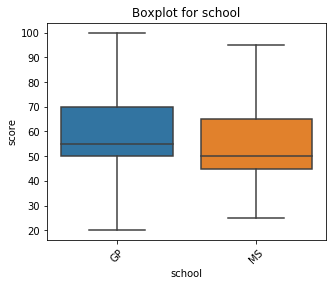

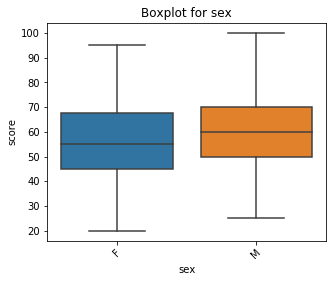

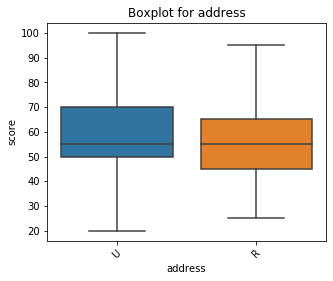

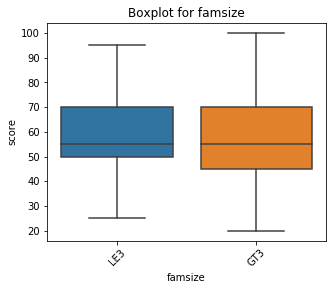

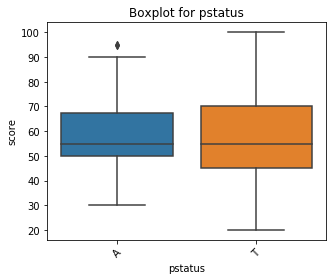

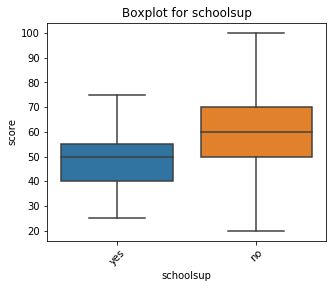

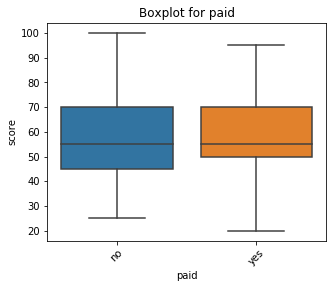

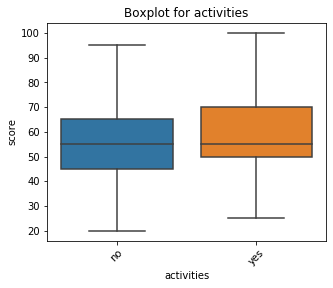

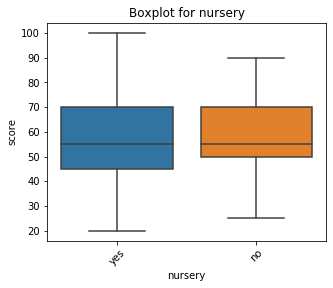

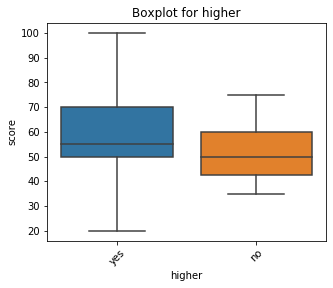

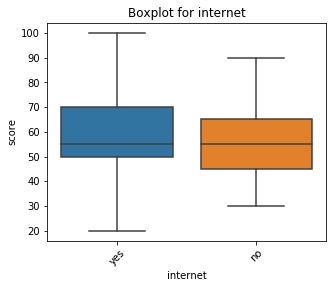

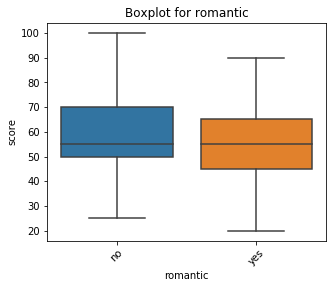

In [41]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'schoolsup', 'paid',
           'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

Похоже, что пол, адрес проживания, совместное жильё родителей, дополнительная образовательная поддержка и желание получить высшее образование влияют на баллы госэкзамена по математике

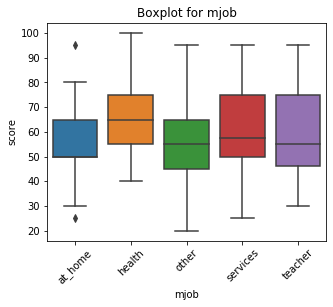

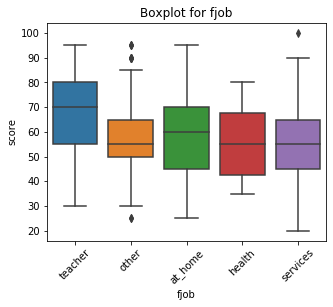

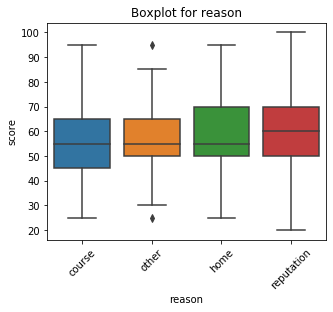

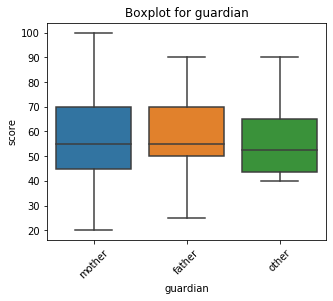

In [42]:
for col in ['mjob', 'fjob', 'reason', 'guardian']:
    get_boxplot(col)

Так же на баллы госэкзамена по математике влияет работа родителей

In [43]:
for col in ['age', 'medu', 'fedu', 'traveltime', 'studytime', 'failures', 'famsup', 'famrel', 'freetime', 'goout', 'health', 'absences', 'school', 'sex', 'address', 'famsize', 'pstatus', 'schoolsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'mjob', 'fjob', 'reason', 'guardian']:
    get_stat_dif(col)

C:\Users\stone\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\stone\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\stone\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\stone\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\stone\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Найдены статистически значимые различия для колонки age
Найдены статистически значимые различия для колонки medu
Найдены статистически значимые различия для колонки fedu
Найдены статистически значимые различия для колонки studytime
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки goout
Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки fjob


Как мы видим, серьёзно отличаются одинадцать параметров: age,  medu, fedu, failures, goout, studytime, sex, schoolsup, mjob, fjob, address и company_location. Оставим эти переменные в датасете для дальнейшего построения модели. Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку,

In [44]:
stud_math_model = stud_math.loc[:, ['medu', 'fedu', 'studytime', 'failures',
                                    'famsup', 'goout', 'address', 'schoolsup', 'mjob', 'fjob', 'score']]
stud_math_model.head()

,medu,fedu,studytime,failures,famsup,goout,address,schoolsup,mjob,fjob,score
0,4.0,4.0,2.0,0.0,no,4.0,U,yes,at_home,teacher,30.0
1,1.0,1.0,2.0,0.0,yes,3.0,U,no,at_home,other,30.0
2,1.0,1.0,2.0,3.0,no,2.0,U,yes,at_home,other,50.0
3,4.0,2.0,3.0,0.0,yes,2.0,U,no,health,at_home,75.0
4,3.0,3.0,2.0,0.0,yes,2.0,U,no,other,other,50.0


## Выводы

Итак, в результате EDA для анализа влияния параметров успешной сдачи госэкзамена по математике были получены следующие выводы:
* Данные содержат довольно большое количество пропусков
* Образование родителе, чем выше образование, тем больше шансов сдать экзамен
* Количество внеучебных занятий после школы
* Семейная образовательная поддержка
* Место проживания
* Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели: 'medu', 'fedu', 'studytime', 'failures', 'famsup', 'goout', 'address', 'schoolsup', 'mjob', 'fjob', 'score'